# What is Ridge Regression?

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values. 

## Cost Function for Ridge Regression

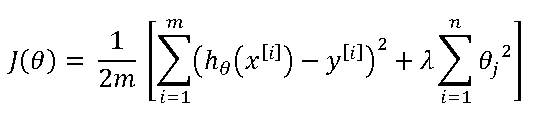

In [30]:
from IPython.display import Image
Image("ridge_regression.png")

Lambda is the penalty term. λ given here is denoted by an alpha parameter in the ridge function. So, by changing the values of alpha, we are controlling the penalty term. Higher the values of alpha, bigger is the penalty and therefore the magnitude of coefficients is reduced.

It shrinks the parameters. Therefore, it is used to prevent multicollinearity
It reduces the model complexity by coefficient shrinkage

### Standardization 
In ridge regression, the first step is to standardize the variables (both dependent and independent) by subtracting their means and dividing by their standard deviations. This causes a challenge in notation since we must somehow indicate whether the variables in a particular formula are standardized or not. As far as standardization is concerned, all ridge regression calculations are based on standardized variables. When the final regression coefficients are displayed, they are adjusted back into their original scale. However, the ridge trace is on a standardized scale.

### Bias 
Bias in machine learning is a type of error in which certain elements of a dataset are more heavily weighted and/or represented than others. A biased dataset does not accurately represent a model's use case, resulting in skewed outcomes, low accuracy levels, and analytical errors.

### Variance
Variance, in the context of Machine Learning, is a type of error that occurs due to a model's sensitivity to small fluctuations in the training set. High variance would cause an algorithm to model the noise in the training set. This is most commonly referred to as overfitting

### Bias and variance trade-off
Bias and variance trade-off is generally complicated when it comes to building ridge regression models on an actual dataset. However, following the general trend which one needs to remember is:

* The bias increases as λ increases.
* The variance decreases as λ increases.

# L1 and L2 Regularization Methods

A regression model that uses **L1 regularization** technique is called Lasso Regression and model which uses **L2** is called Ridge Regression.

* Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function
* Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function.

The key difference between these techniques is that Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features

### Assumptions of Ridge Regressions
The assumptions of ridge regression are the same as that of linear regression: linearity, constant variance, and independence. However, as ridge regression does not provide confidence limits, the distribution of errors to be normal need not be assumed.

# Ridge and Lasso Regression

In [1]:
from sklearn.datasets import load_boston

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Microsoft\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Microsoft\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
df = load_boston()

In [4]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
dataset = pd.DataFrame(df.data)

In [6]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
dataset.columns = df.feature_names

In [8]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
df.target.shape

(506,)

In [11]:
dataset['Price'] = df.target

In [12]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
X = dataset.iloc[:,:-1] # Independent variable
y = dataset.iloc[:,-1] # Target variable

# Linear Regression

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [16]:
lin_regressor  = LinearRegression()
mse = cross_val_score(lin_regressor,X,y,scoring = 'neg_mean_squared_error',cv = 5)
mean_mse = np.mean(mse)
print(mean_mse)

-37.131807467699204


# Ridge Regression

In [19]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring = 'neg_mean_squared_error',cv = 5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [20]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-29.905701947540383


# Lasso Regression

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [22]:
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring = 'neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,y)

C:\Users\Microsoft\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4798.753876301551, tolerance: 3.919148542079209
  positive)
C:\Users\Microsoft\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3556.8307435588295, tolerance: 3.3071316790123464
  positive)
C:\Users\Microsoft\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4231.574357095869, tolerance: 2.813643886419753
  positive)
C:\Users\Microsoft\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of ite

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [23]:
print(lasso_regressor.best_estimator_)
print(lasso_regressor.best_params_)


Lasso(alpha=1)
{'alpha': 1}


In [24]:
print(lasso_regressor.best_score_)


-35.53158022069486


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state =0)

In [26]:
prediction_lasso = lasso_regressor.predict(X_test)
prediction_ridge = ridge_regressor.predict(X_test)

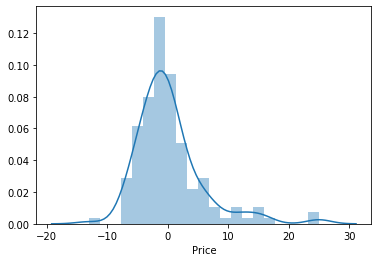

In [28]:
import seaborn as sns 
sns.distplot(y_test - prediction_lasso)

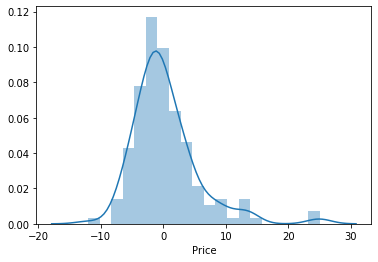

In [29]:
sns.distplot(y_test - prediction_ridge)